In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [179]:
file_path = r'C:\Users\User\OneDrive\Desktop\all_in_one\customer_segmentation\Mall_Customers.csv'

df = pd.read_csv(file_path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [180]:
category_map = {
    'Male': 1,
    'Female' : 0
}
df['Gender'] = df['Gender'].map(category_map)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [182]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [183]:
df['Gender'].value_counts().sum

<bound method Series.sum of Gender
0    112
1     88
Name: count, dtype: int64>

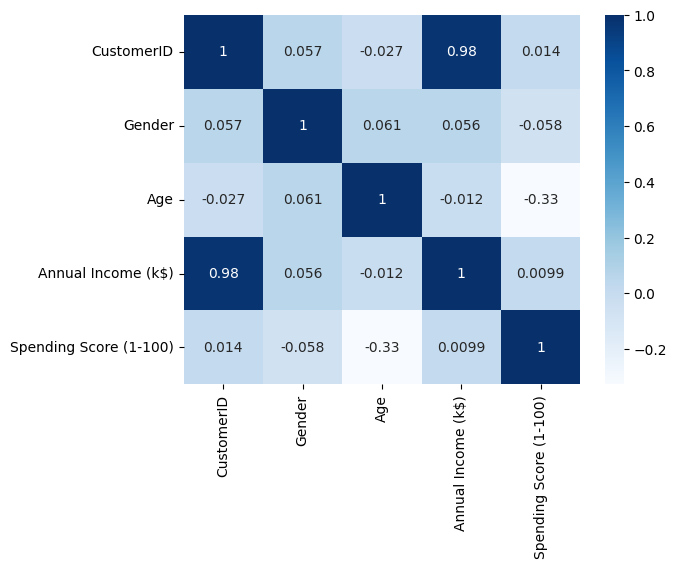

In [184]:
import seaborn as sns

sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

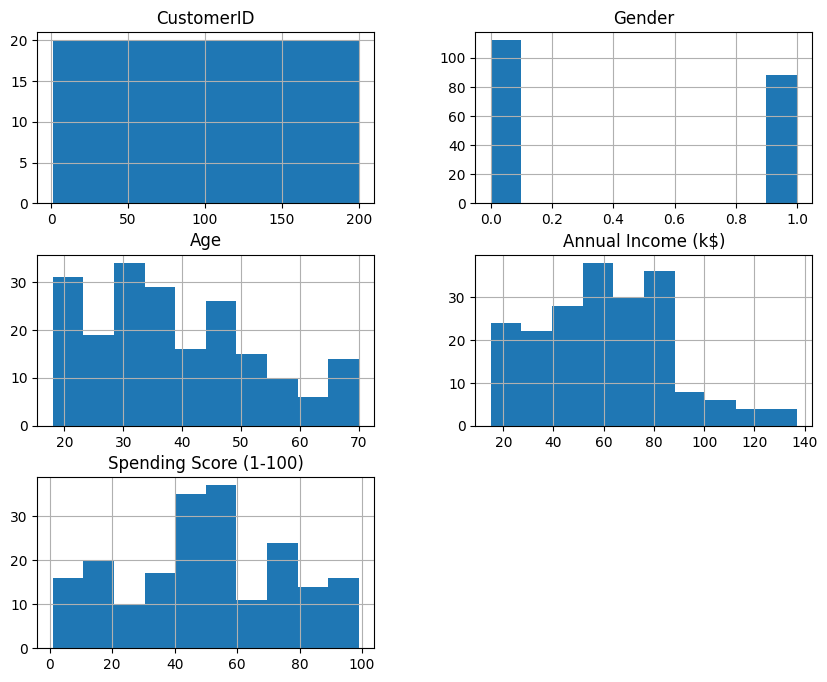

In [185]:
df.hist(figsize=(10,8))
plt.show()

In [186]:
def plot_boxplot(data, column, by=None, title=None, xlabel=None, ylabel=None, color='lightblue'):

    box = data.boxplot(column=column, by=by, patch_artist=True, grid=False, figsize=(8, 6))
    if title:
        plt.title(title)
    else:
        plt.title(f"Boxplot of {column}")
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.suptitle("") 
    plt.show()


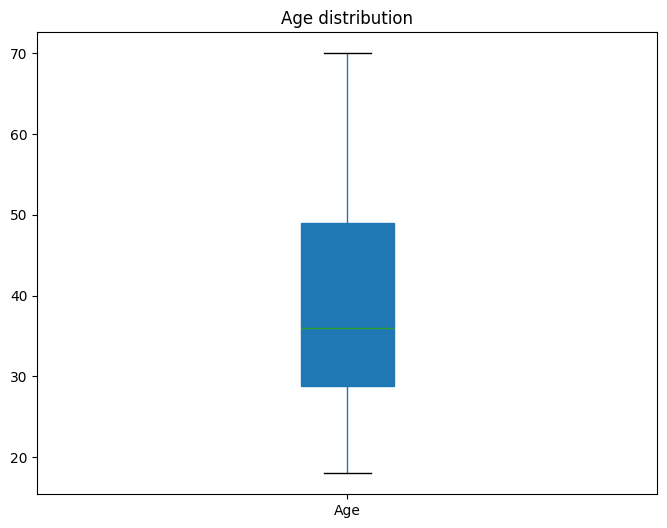

In [187]:
plot_boxplot(df,column='Age',title="Age distribution")

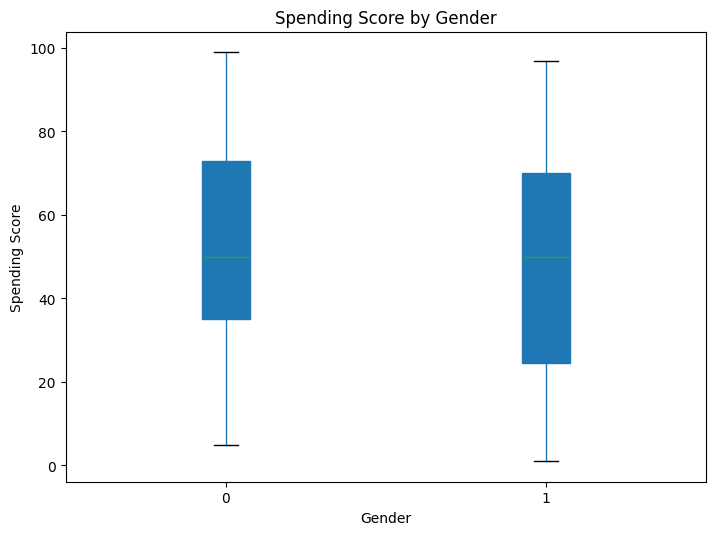

In [188]:
plot_boxplot(data=df, column="Spending Score (1-100)", by="Gender", 
             title="Spending Score by Gender", xlabel="Gender", ylabel="Spending Score")
# 0 is female and 1 is male

In [189]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [191]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=41).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans 

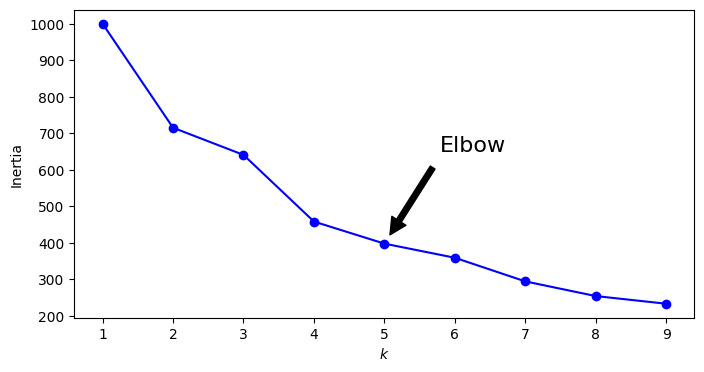

In [192]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel('$k$')
plt.ylabel("Inertia")
plt.annotate('Elbow',
             xy=(5,inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black',shrink=0.1))
plt.show()

In [193]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

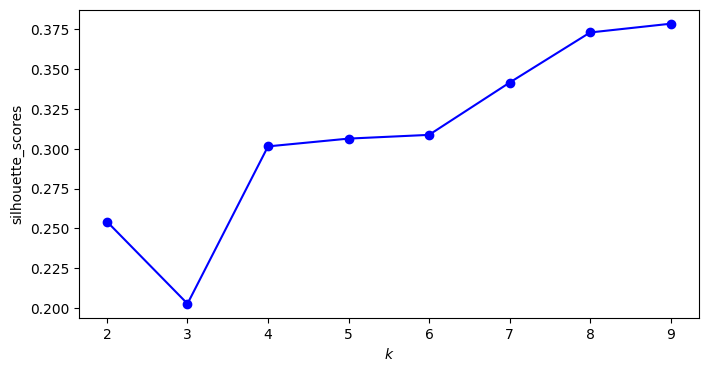

In [194]:
plt.figure(figsize=(8,4))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.xlabel('$k$')
plt.ylabel("silhouette_scores")
plt.show()

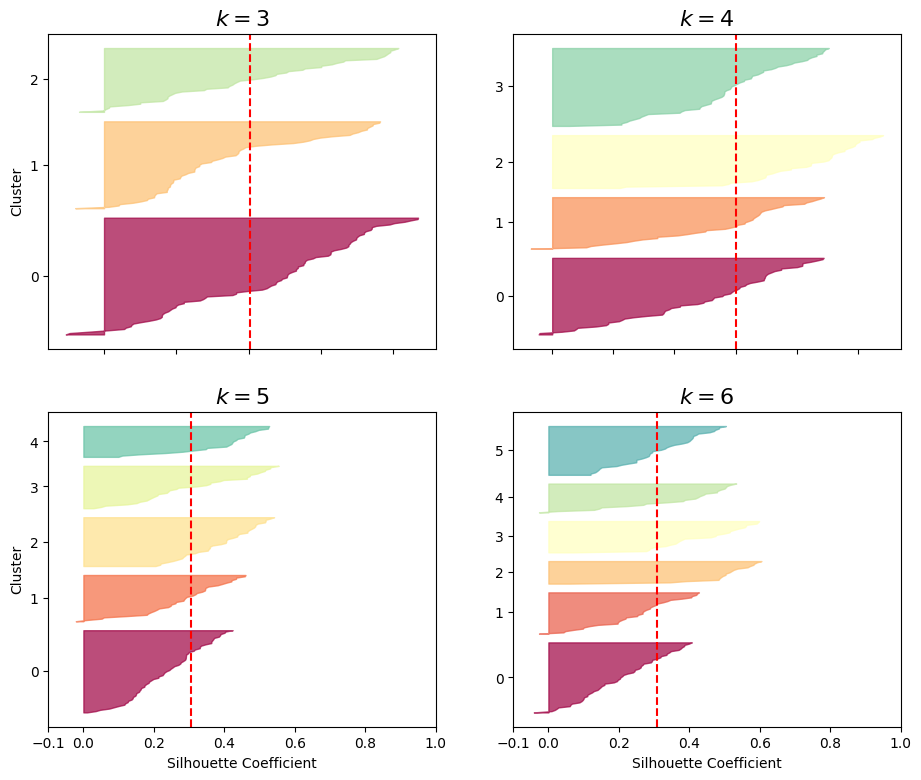

In [195]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [196]:
best_kmeans = KMeans(n_clusters=5,random_state=42)
best_kmeans.fit(X)

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [197]:
best_kmeans.inertia_

404.6481832764364

In [198]:
silhouette_score(X,best_kmeans.labels_)

np.float64(0.28733914723855114)

## Visualize the cluster

### PCA

In [199]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
kmeans_pca2 = KMeans(n_clusters=5,random_state=42)
kmeans_pca2.fit(X_pca2)

y_kmeans = kmeans_pca2.fit_predict(X_pca2)
y_kmeans

c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 4, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

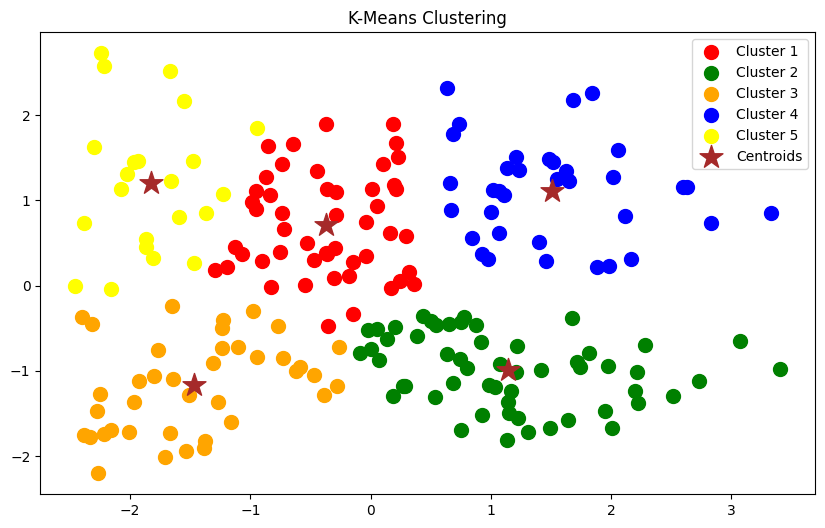

In [201]:
plt.figure(figsize=(10, 6))

plt.scatter(X_pca2[y_kmeans == 0, 0], X_pca2[y_kmeans == 0, 1], c='red', s=100, label='Cluster 1')
plt.scatter(X_pca2[y_kmeans == 1, 0], X_pca2[y_kmeans == 1, 1], c='green', s=100, label='Cluster 2')
plt.scatter(X_pca2[y_kmeans == 2, 0], X_pca2[y_kmeans == 2, 1], c='orange', s=100, label='Cluster 3')
plt.scatter(X_pca2[y_kmeans == 3, 0], X_pca2[y_kmeans == 3, 1], c='blue', s=100, label='Cluster 4')
plt.scatter(X_pca2[y_kmeans == 4, 0], X_pca2[y_kmeans == 4, 1], c='yellow', s=100, label='Cluster 5')

plt.scatter(kmeans_pca2.cluster_centers_[:, 0], kmeans_pca2.cluster_centers_[:, 1], 
           s=300, c='brown', marker='*', label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Comparison between inertia and silhouette_score on pca and best_kmeans with 4 dimension

In [202]:
print(best_kmeans.inertia_,kmeans_pca2.inertia_)
print(silhouette_score(X,best_kmeans.labels_),silhouette_score(X,kmeans_pca2.labels_))

404.6481832764364 144.0510572922339
0.28733914723855114 0.2765044014284472
